In [1]:
from sklearn.manifold import TSNE
import yaml
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.append(os.path.abspath('..'))
from prompt import PromptEngine

In [2]:
# from BCEmbedding import EmbeddingModel
from langchain_community.embeddings import HuggingFaceEmbeddings
sentences = ['python 是什么', '请介绍一下 python']
# model = EmbeddingModel(model_name_or_path="maidalun1020/bce-embedding-base_v1")
model = HuggingFaceEmbeddings(model_name='maidalun1020/bce-embedding-base_v1')

/data/zhelonghuang/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/zhelonghuang/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
embeddings = model.embed_documents(sentences)

In [4]:
engine = PromptEngine('../config/story.yml')
engine.merge_stories_from_yml('../config/github-issue.story.yml')

sentences = []
labels = []
for story in engine.stories:
    sentences.append(story.message)
    labels.append(engine.intent2id[story.intent])
sentences, labels

(['请问 property.json 如何配置？',
  '我的自动补全无法使用，是不是有bug？',
  '帮我上传一下这份数据',
  'surface了解一下？',
  '大佬们，为啥我的digital ide启动之后所有功能都没启动捏？我配置了property文件，然后插件的vivado路经和modelsim路经都加上了',
  '这群要被chisel夺舍了吗',
  'Metals一开直接报错',
  '话说digital-ide打开大的verilog卡死了',
  '请问一下，第一次点击对文件仿真可以出波形文件，再次点击的时候就会提示unknown module type了。是哪个配置没配置好？',
  '怎么调整是哪个版本的vivado来构建工程呢',
  '咱们这个插件win7的vscode是不是只能用很早之前的版本',
  '帮我将这份数据保存到服务器上',
  '他这个意思是 单个功耗很低 但是功耗低那肯定性能就寄 频率肯定不高 靠人多',
  '我平时写代码就喜欢喝茶',
  '感觉现在啥都在往AI靠',
  '请问你们自动对齐插件用的啥？',
  '不得不放一下我的咖啡笔记了',
  'stm32有什么好玩的应用不',
  '别人设置的肯定有点不合适自己的',
  'http://hehezhou.cn/register2024/AArch64-regindex.html',
  '因为他们py本领不是很强，需要这些东西辅助',
  '写C写多了，顺手在pycharm写了个main.c',
  '好流畅的にほんじんです',
  '有没有接触过UI开发的，想做一款寄存器管理的工具，想把界面做的好看一点',
  '现在嘉立创也在做FPGA了？',
  '大佬们，更新0.3.3之后，用iverilog仿真，testbench中还是例化模块出错：unknown module type，这是什么原因啊？',
  '查了一下记录，2017年买的静电容',
  '我小时候电脑刚买回来一星期就被我玩坏了',
  'command not found: python',
  'path top.v is not a hdlFile 请问报这个错误大概是啥原因啊',
  '咖啡喝不了，喝了胃不舒服',
  '关于波形显示的一些建议',
  '采用iverilo

In [5]:
embedding = model.embed_documents(sentences)
embedding = np.array(embedding)
embedding.shape

(94, 768)

In [6]:
tsne = TSNE(n_components=2)
plots = tsne.fit_transform(embedding)

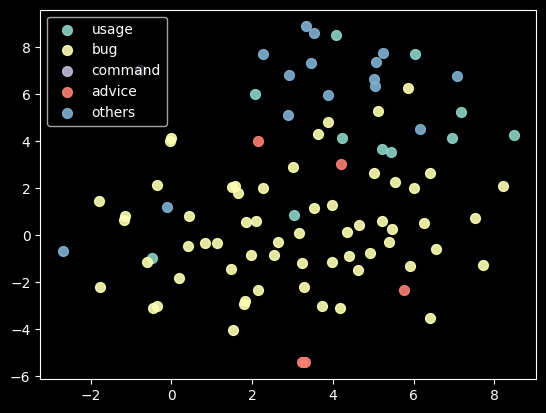

In [7]:
labels = np.array(labels)
for label in set(labels):
    mask = labels == label
    cor_plots = plots[mask]
    plt.scatter(cor_plots[:, 0], cor_plots[:, 1], s=50, alpha=0.9, label=engine.id2intent[label])
plt.legend()

In [8]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(embedding, labels)

LogisticRegression()

In [9]:
test_sentence = ['咖啡喝不了，喝了胃不舒服']
test_embedding = model.embed_documents(test_sentence)
log_model.predict(test_embedding)

array([5])

In [10]:
import joblib
joblib.dump(log_model, '../model/embedding_mapping.sklearn')

['../model/embedding_mapping.sklearn']

In [11]:
log_model = joblib.load('../model/embedding_mapping.sklearn')

In [12]:
test_sentence = ['咖啡喝不了，喝了胃不舒服']
test_embedding = model.embed_documents(test_sentence)
log_model.predict(test_embedding)

array([5])

In [13]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(embedding, labels)

SVC()

In [15]:
# test_sentence = ['咖啡喝不了，喝了胃不舒服']
# test_embedding = model.embed_documents(test_sentence)
# svm.predict(test_embedding)
# joblib.dump(log_model, '../model/embedding_mapping.sklearn')

['../model/embedding_mapping.sklearn']